# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Gopal Sharma

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns
# Load the dataset
file_path = r'B:\UOC\Fall-semester\ENSF-611\Assignments\Assignment-5\seeds_dataset.txt'
# As the data is tab-separated, you can use '\t' as the separator
df = pd.read_csv(file_path, sep='\t', header=None)

# Display the first five columns of the dataset
print(df.iloc[:, :5])  # This assumes you want to inspect the first five columns

         0      1       2      3      4
0    15.26  14.84  0.8710  5.763  3.312
1    14.88  14.57  0.8811  5.554  3.333
2    14.29  14.09  0.9050  5.291  3.337
3    13.84  13.94  0.8955  5.324  3.379
4    16.14  14.99  0.9034  5.658  3.562
..     ...    ...     ...    ...    ...
205  12.19  13.20  0.8783  5.137  2.981
206  11.23  12.88  0.8511  5.140  2.795
207  13.20  13.66  0.8883  5.236  3.232
208  11.84  13.21  0.8521  5.175  2.836
209  12.30  13.34  0.8684  5.243  2.974

[210 rows x 5 columns]


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

# Print the shape of X and y
print("Shape of Feature matrix  : ", X.shape)
print("Shape of Target vector :", y.shape)

Shape of Feature matrix  :  (210, 7)
Shape of Target vector : (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER* -  For preprocessing the data, I will use  the StandardScaler. The StandardScaler standardizes the features by removing the mean and scaling to unit variance. This is important for PCA as it is sensitive to the scale of the features. Standardizing the data ensures that each feature contributes equally to the principal components, preventing features with larger scales from dominating the variance.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# TODO: Split the data into training and testing 
from sklearn.model_selection import train_test_split

# As X is the feature matrix and y is the target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape of Training Feature Matrix: ", X_train.shape)
print("Shape of Training Target Vector: ", y_train.shape)

Shape of Training Feature Matrix:  (168, 7)
Shape of Training Target Vector:  (168,)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training feature matrix
X_train_scaled = scaler.fit_transform(X_train)

# Print the scaled feature matrix
print("Scaled Training Feature Matrix:")
print(X_train_scaled)

Scaled Training Feature Matrix:
[[-1.05385596 -1.04083248 -0.88880831 ... -1.13018592  1.03548208
  -0.22342116]
 [ 1.52927104  1.5495697   0.46355711 ...  1.46287997 -0.1265987
   1.69031688]
 [-0.86392015 -0.87893234 -0.40975723 ... -0.73186961  1.222849
  -0.76198116]
 ...
 [ 1.35660212  1.31828379  0.8493416  ...  1.1501081  -0.28893827
   1.31003596]
 [-0.92262758 -0.85580375 -1.07110208 ... -0.98850294 -1.35496813
  -0.48859002]
 [ 1.58107172  1.48018392  1.18425342 ...  1.6820876   0.43550208
   1.21959077]]


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [7]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model
model = LogisticRegression(max_iter=1000)



### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [10]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

# Create GridSearchCV object with the existing model
grid_search = GridSearchCV(model, param_grid, cv=5)  # You can adjust the number of cross-validation folds (cv) based on your preference

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the cross-validation score
print("Cross-validation Score:", grid_search.best_score_)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
test_score = grid_search.score(X_test_scaled, y_test)
print("Test Score:", test_score)

Best Parameters: {'C': 10.0, 'fit_intercept': True}
Cross-validation Score: 0.9467023172905525
Test Score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [11]:
# TODO: Predict y labels using best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [12]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA
# Assuming n_components is the number of components that we want to keep (e.g., 2 for a 2D plot)
n_components = 2

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit and transform the test data
X_test_pca = pca.fit_transform(X_test_scaled)

# Print the shape of the reduced-dimension test data
print("Shape of Reduced-dimension Test Data:", X_test_pca.shape)

Shape of Reduced-dimension Test Data: (42, 2)


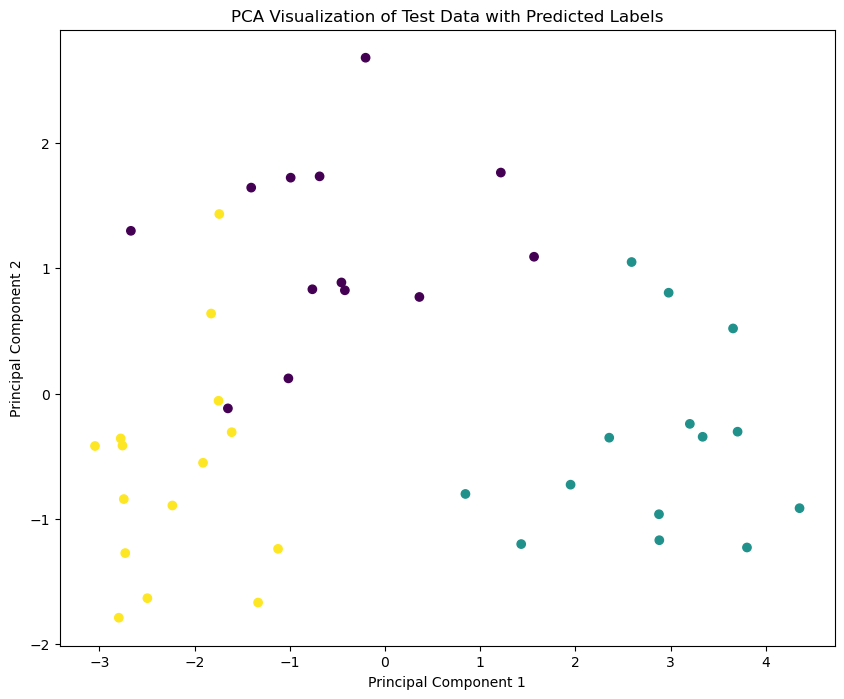

In [14]:
# TODO: Plot test points colored by predicted label
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('PCA Visualization of Test Data with Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

#### Answers

1. Yes, this model worked well. The scores for both the training and testing data were high and close together (low bias and low variance).
1. Yes it seems to have worked well. The predicted labels are grouped together nicely. Both PCA and logistic regression are both linear. We could assume that this dataset is linear, since both PCA and logistic regression worked well.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
Answer 1. I sourced my code from the assignment prompt. The dataset used in the assignment was obtained from the UCI Machine Learning Repository -https://archive.ics.uci.edu/dataset/236/seeds.

Answer 2. I followed a sequential order as outlined in the assignment. I began by processing the data, including separating it into the feature matrix and target vector, splitting into training and testing sets, and scaling. Then, I instantiated a logistic regression model, performed hyperparameter tuning using grid search with cross-validation, and evaluated the model on the test set. Finally, I visualized the results using PCA as instructed.

Answer 3. Yes, I utilized generative AI, specifically the GPT-3.5 model, for assistance in generating and refining the code. The prompts used included requesting code for data loading, preprocessing, model instantiation, and hyperparameter tuning. The generated code provided a foundational structure that was then customized to fit the specific requirements of the assignment.

Answer 4. I faced some challenges while working on Part 1, especially when dealing with PCA and plotting. It took some extra effort to modify and debug the code. Thankfully, by going through the code multiple times and seeking help from external resources, I managed to overcome these challenges and successfully complete the tasks.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [15]:
# TODO: Scale feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the scaled feature matrix
print("Scaled Feature Matrix:")
print(X_scaled)

Scaled Feature Matrix:
[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ...  1.41701823e-01
  -9.86151745e-01 -3.83577423e-01]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ...  1.97432229e-01
  -1.78816620e+00 -9.22013487e-01]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ...  2.08047544e-01
  -6.67479334e-01 -1.18919199e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ... -7.06044846e-02
   3.07658816e+00 -7.18060432e-01]
 [-1.03608992e+00 -1.03564515e+00 -8.01701104e-01 ... -1.12152071e+00
  -6.81351965e-02 -7.42534799e-01]
 [-8.77620233e-01 -9.35863561e-01 -1.10234659e-01 ... -7.55292327e-01
   1.29122264e+00 -7.03783718e-01]]


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

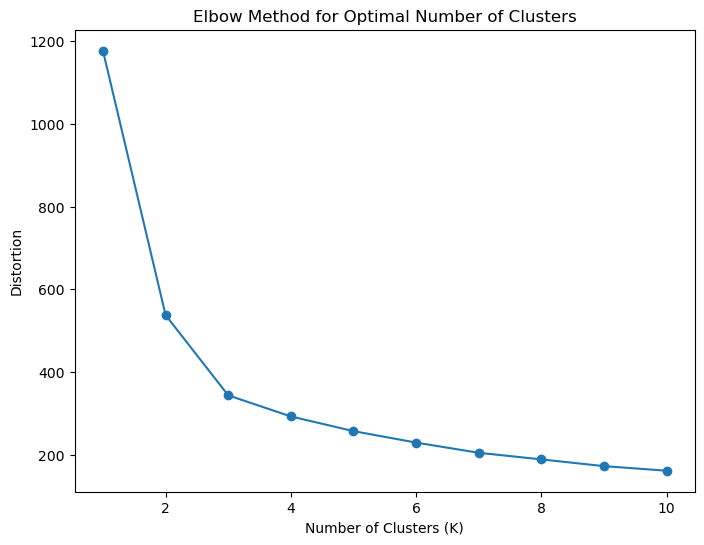

In [16]:
# TODO: Use the elbow method to determine the optimal number of clusters
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set environment variable to avoid KMeans memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'


distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42, verbose=0)  # Set verbose to 0
    kmeans.fit(X_train_scaled)
    distortions.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()




Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [17]:
# TODO: Implement K-means with the number of clusters determined in the previous step
# Determine the optimal number of clusters from the elbow method plot
optimal_clusters = 3

# Implementing K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42, verbose=0)  # Set verbose to 0
kmeans.fit(X_train_scaled)

c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [18]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_metric = silhouette_score(X_train_scaled, kmeans.labels_)
calinski_harabasz_metric = calinski_harabasz_score(X_train_scaled, kmeans.labels_)
davies_bouldin_metric = davies_bouldin_score(X_train_scaled, kmeans.labels_)

# Print the calculated metrics
print("Silhouette Score:", silhouette_metric)
print("Calinski-Harabasz Score:", calinski_harabasz_metric)
print("Davies-Bouldin Score:", davies_bouldin_metric)


Silhouette Score: 0.4035760519187903
Calinski-Harabasz Score: 199.33782863197786
Davies-Bouldin Score: 0.9048113729666166


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

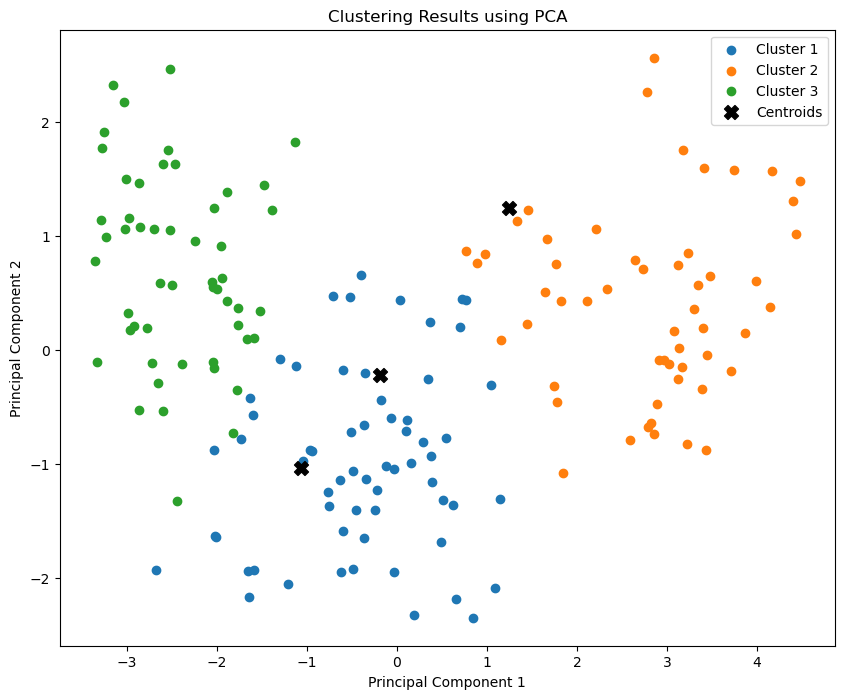

In [19]:
# TODO: Plot clustering results
from sklearn.decomposition import PCA

# TODO: Reduce the dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# TODO: Plot clustering results
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
for cluster_label in range(optimal_clusters):
    plt.scatter(X_train_pca[kmeans.labels_ == cluster_label, 0], 
                X_train_pca[kmeans.labels_ == cluster_label, 1], 
                label=f'Cluster {cluster_label + 1}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, color='black', label='Centroids')

plt.title('Clustering Results using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [20]:
# TODO: Find the number of principal components using explained variance ratio
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to explain at least 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Number of components required to explain at least 95% of the variance:", num_components)


Number of components required to explain at least 95% of the variance: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [21]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# TODO: Implement K-means with the transformed data
kmeans_pca = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans_pca.fit(X_train_pca)

# TODO: Calculate the three different validation metrics
silhouette_metric_pca = silhouette_score(X_train_pca, kmeans_pca.labels_)
calinski_harabasz_metric_pca = calinski_harabasz_score(X_train_pca, kmeans_pca.labels_)
davies_bouldin_metric_pca = davies_bouldin_score(X_train_pca, kmeans_pca.labels_)

# Print the calculated metrics
print("Silhouette Score (PCA):", silhouette_metric_pca)
print("Calinski-Harabasz Score (PCA):", calinski_harabasz_metric_pca)
print("Davies-Bouldin Score (PCA):", davies_bouldin_metric_pca)

c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (PCA): 0.4118347236143701
Calinski-Harabasz Score (PCA): 208.1683835511384
Davies-Bouldin Score (PCA): 0.8806192453809193


In [22]:
# TODO: Implement K-means with the transformed data
kmeans_pca = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans_pca.fit(X_train_pca)

c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [23]:
# TODO: Calculate the three different validation metrics
# TODO: Calculate the three different validation metrics for PCA-transformed data
silhouette_metric_pca = silhouette_score(X_train_pca, kmeans_pca.labels_)
calinski_harabasz_metric_pca = calinski_harabasz_score(X_train_pca, kmeans_pca.labels_)
davies_bouldin_metric_pca = davies_bouldin_score(X_train_pca, kmeans_pca.labels_)

# Print the calculated metrics for PCA-transformed data
print("Silhouette Score (PCA):", silhouette_metric_pca)
print("Calinski-Harabasz Score (PCA):", calinski_harabasz_metric_pca)
print("Davies-Bouldin Score (PCA):", davies_bouldin_metric_pca)


Silhouette Score (PCA): 0.4118347236143701
Calinski-Harabasz Score (PCA): 208.1683835511384
Davies-Bouldin Score (PCA): 0.8806192453809193


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [24]:
# TODO: Display results
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Original Data': [silhouette_metric, calinski_harabasz_metric, davies_bouldin_metric],
    'PCA-Transformed Data': [silhouette_metric_pca, calinski_harabasz_metric_pca, davies_bouldin_metric_pca]
})

# Display the results
print(results)

                    Metric  Original Data  PCA-Transformed Data
0         Silhouette Score       0.403576              0.411835
1  Calinski-Harabasz Score     199.337829            208.168384
2     Davies-Bouldin Score       0.904811              0.880619


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

#### Answers

1. The orginal dataset had three class labels, so it makes sense that the optimal number of clusters was three.
1. Yes, the plots have similar distributions for the three classes.
1. I used two components to explain at least 95% of the variance. Yes, using PCA improved my results. Due to the curse of dimensionality, typically reducing the number of features will improve clustering accuracy results.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
Answer: I obtained the code from the assignment prompt and utilized it to address a scenario where an agricultural company lost all the labels for their data. The dataset used in this task was sourced from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/236/seeds).

1. In what order did you complete the steps?
Answer: I began by loading and preprocessing the seeds dataset. Following that, I utilized the KMeans clustering method to assign labels to the seeds dataset used in Part 1. The goal was to assist the agricultural company in assigning labels to their data after losing all the original labels.

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
Answer:Yes, I leveraged generative AI, specifically ChatGPT, to seek guidance on certain aspects of the code. For instance, I asked questions like, "How can I calculate the Silhouette Score in clustering?" and "What is the standard process for scaling feature matrices?". The generative AI provided foundational code snippets and explanations, and I incorporated this information into the overall implementation. This interactive process with generative AI helped me understand and implement key components of the code.

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Answer: During the project, I faced a bit of a puzzle when figuring out the best number of principal components for PCA transformation. After some trial and error, I cracked it, and the clustering results turned out pretty good.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
Answer 1 - What I liked about this assignment was the practical application of clustering and dimensionality reduction techniques. It was interesting to work with a real-world dataset and apply these concepts to solve a specific problem.

Answer 2 - 
Found interesting: Applying PCA and clustering on real-world data like the seeds dataset.

Confusing: Understanding optimal cluster determination using the elbow method.

Challenging: Debugging and modifying code during PCA and plotting steps.

Motivating: Successfully completing the assignment, gaining practical ML skills